In [12]:
library(igraph)
library("readxl")
library(ggplot2)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [13]:
## RUTA DE LOS ARCHIVOS
ruta<-"/home/diego/Documentos/PiedrasTDA/"

In [14]:
## Obtiene los nombres de los archivos en la ruta especificada

archivos=list.files(path = ruta, pattern = "Matriz", all.files = FALSE,
             full.names = FALSE, recursive = FALSE,
             ignore.case = FALSE, include.dirs = FALSE, no.. = FALSE)

In [15]:
##CARGA TODO LOS ARCHIVOS

archivos=purrr::discard(archivos,.p = ~stringr::str_detect(.x,"MatrizAdyacencia_MuestraDeMano.xlsx"))

In [16]:
#Recupera las Matrices de los archivos junto con sus nombres  
matrices=list() #lista de matrices y nombres
for(i in 1:length(archivos)){  #itera para cada archivo
    df<-read_excel(paste(ruta,archivos[i],sep=""),col_names=FALSE) #lee el excel 
    aux=list(df,archivos[i]) #lo convierte la matriz a lista
    matrices[[i]]<-aux #la ingresa a la lista de matrices
}

In [17]:
#funcion que regresa las graficas
#Ingresa una lista 
graphs<-function(lista){
    graphs<-list()  #declara una lista de gráficas
    for(i in 1:length(lista)){  #itera hasta la longitud de la lista   
        M=as.matrix(lista[[i]][[1]])   #convierte a matriz la lista
        graph=graph_from_adjacency_matrix(M,mode="undirected")  #obtiene de la lista la grafica
        aux=list(graph,lista[[i]][[2]]) #ingresa la grafica y el nombre a una lista
        graphs[[i]]<-aux   #ingresa la lista con la grafica y nombre en la lista de graficas
    }
    return(graphs) #Regresa la lista
}

In [18]:
#matrices[[1]][[1]]

# METRICAS

## ENERGÍA

In [19]:
#Recibe los eigenvalores de la matriz asociada a una gráfica G
#Devuelve la energía de la gráfica.
energy<-function(lista){
    ener=0
    for(i in 1:length(lista[[1]])){
     ener=ener+abs((lista[[1]][[i]]))
    }
    return(ener)
}


energy1<-function(matrix){
    lista<-eigen(matrix)[[1]]
    total<-0
    for(i in 1:length(lista)){
        total<-total+abs(lista[[i]])
    }
    return(total)
}

## Energía promedio

In [20]:
#for(i in 1:length(matrices)){
#    cat(matrices[[i]][[2]],energy(eigen(matrices[[i]][[1]]))/length(matrices[[i]][[1]]),sep="\n")
#}

## GRADO y GRADO PROMEDIO

In [21]:
#GRADO POR VERTICE
grado<-function(matriz){
    tot=list()
    for(i in 1:length(matriz)){
        tot[[i]]<-sum(matriz[[i]])
    }
        return(tot)
}

#GRADO DE UN VERTICE
grado_per_vertex<-function(matrix,index){
    return(sum(matrix[[index]]))
}

#GRADO PROMEDIO
grado_prom<-function(matriz){
    tot=0
    n=length(matriz)
    for(i in 1:n){
        tot<-tot+sum(matriz[[i]])
    }
        return(tot/n)
}


## DIAMETRO Y RADIO

In [22]:
#help(diameter)
#help(radius)
#Graph 18 (8)
graph=graph_from_adjacency_matrix(as.matrix(matrices[[23]][[1]]),mode="undirected")
diameter(graph,directed=FALSE,unconnected=TRUE)
radius(graph)

[1] 12

[1] 2

In [23]:
#generator2.1(2,5)

In [24]:
#grado(matrices[[18]][[1]])
#grado_per_vertex(matrices[[18]][[1]],1)
#grado_prom(matrices[[18]][[1]])

## GENERADOR DE GRAFICAS

In [25]:
#GENERADOR DE GRÁFICAS 
#RECIBE EL NÚMERO DE VERTICES Y EL GRADO PROMEDIO
#REGRESA UNA GRÁFICA
p<-function(energy){
    return(as.integer(2.103+0.892*energy))
}

generator<-function(gprome,n){
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    k<-0 #Variable auxiliar
    kn<-0 #Variable que adquiere el promedio
    bandera<-FALSE
    for(i in 1:(n-1)){
        if (i!=(n-1)){
            for(j in (i+1):(i+2)){
                r<-runif(1,0,1)
                if (r<0.5){
                    gra<-add.edges(gra,c(i,j)) #Agrega una arista en los vertices i,j
                }
                d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
                f=as.matrix(d)   #genera una lista con l matriz de adyacencia y un caracter
                k<-grado_prom(f)
                if(abs(gprome-k)<1){
                    bandera<-TRUE
                    break
                }
            }
            if(bandera==TRUE){
                break
            }
        }
    }
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    #return(f)
    
}

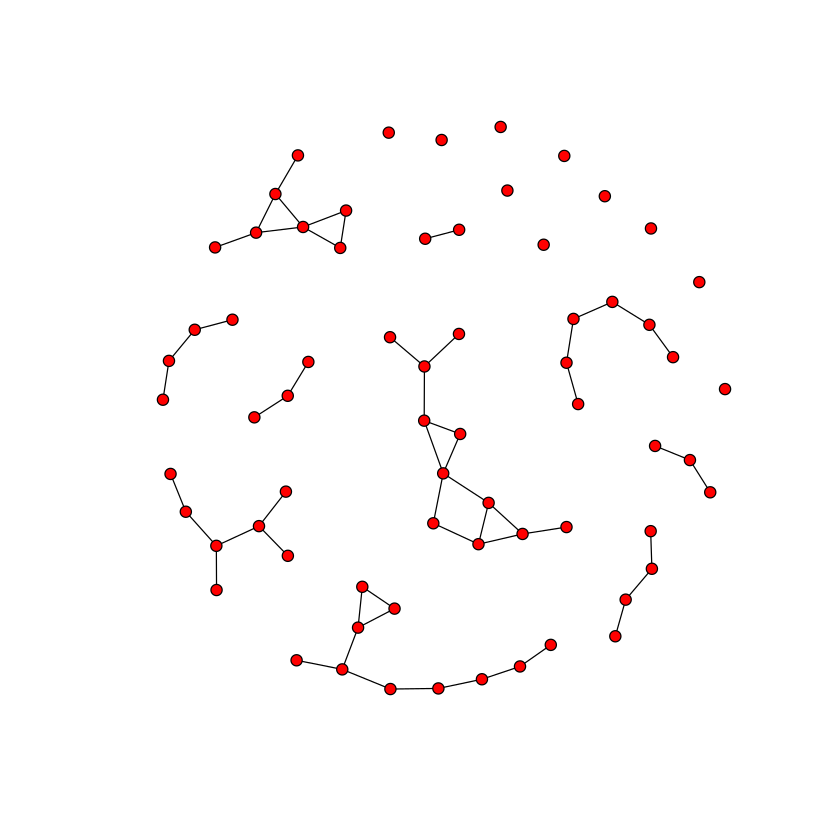

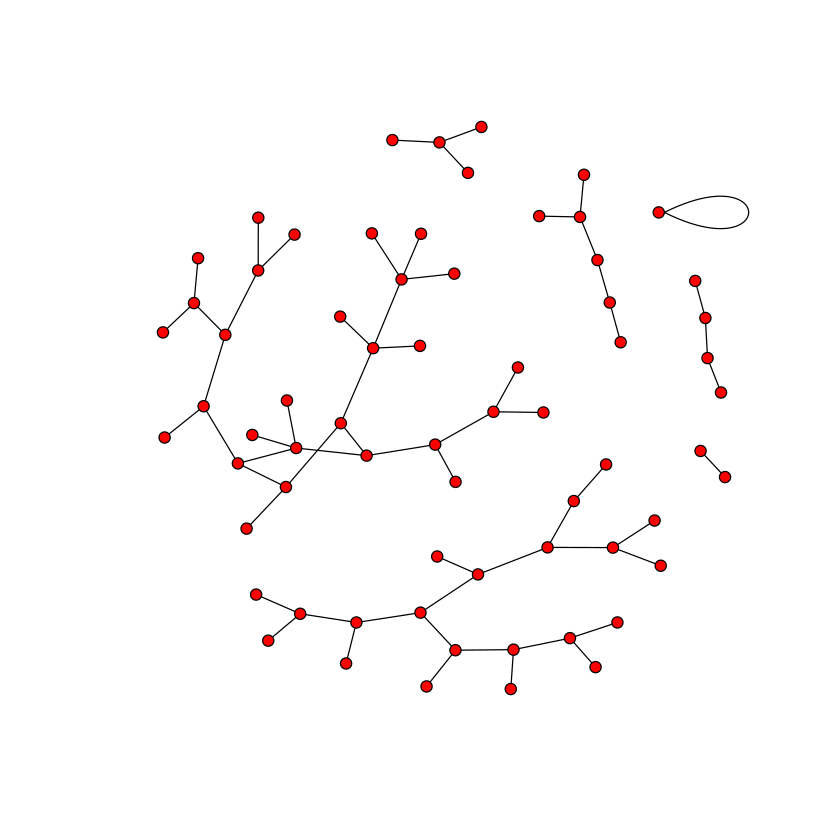

In [26]:
#GENERADA GRADO PROMEDIO Y NUM DE VERTICES
generator(1.8,67)

#ORIGINAL
a<-as.matrix(matrices[[18]][[1]])
graph=graph_from_adjacency_matrix(a,mode="undirected")
plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    

In [8]:
#grado_prom(matrices[[1]][[1]])
#length(matrices[[1]][[1]])

In [9]:
#generator(2,147)
#ORIGINAL
#a<-as.matrix(matrices[[1]][[1]])
#graph=graph_from_adjacency_matrix(a,mode="undirected")
#plot.igraph(graph,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    

# GENERADOR DE ENERGÍA

In [19]:
#GENERADOR DE GRÁFICAS 
#RECIBE EL NÚMERO DE VERTICES Y EL GRADO PROMEDIO
#REGRESA UNA GRÁFICA
generator_e<-function(energia,n){
    new<-data.frame(ENERGY=energia)
    #n<-as.integer(predict(linear,new)) #REGRESION
    gra<-make_empty_graph(directed=FALSE) #Crea la gráfica vacia
    gra<-add.vertices(gra,n) #Agrega los vertices
    k<-0 #Variable auxiliar
    kn<-0 #Variable que adquiere el promedio
    bandera<-FALSE
    for(i in 1:(n-1)){
        if (i!=(n-1)){
            for(j in (i+1):(i+2)){
                r<-runif(1,0,1)
                if (r<0.5){
                    gra<-add.edges(gra,c(i,j)) #Agrega una arista en los vertices i,j
                }
                d<-get.adjacency(gra)      #Recupera la matriz de adyacencia
                f=as.matrix(d)   #genera una lista con l matriz de adyacencia y un caracter
                k<-energy1(f)
                if(abs(energia-k)<1){
                    bandera<-TRUE
                    break
                }
            }
            if(bandera==TRUE){
                break
            }
        }
    }
    plot.igraph(gra,vertex.color="red",edge.color="black",vertex.size=4,vertex.label=NA)
    return(f)
    
}

[1] 72.06734

[1] 72.31574

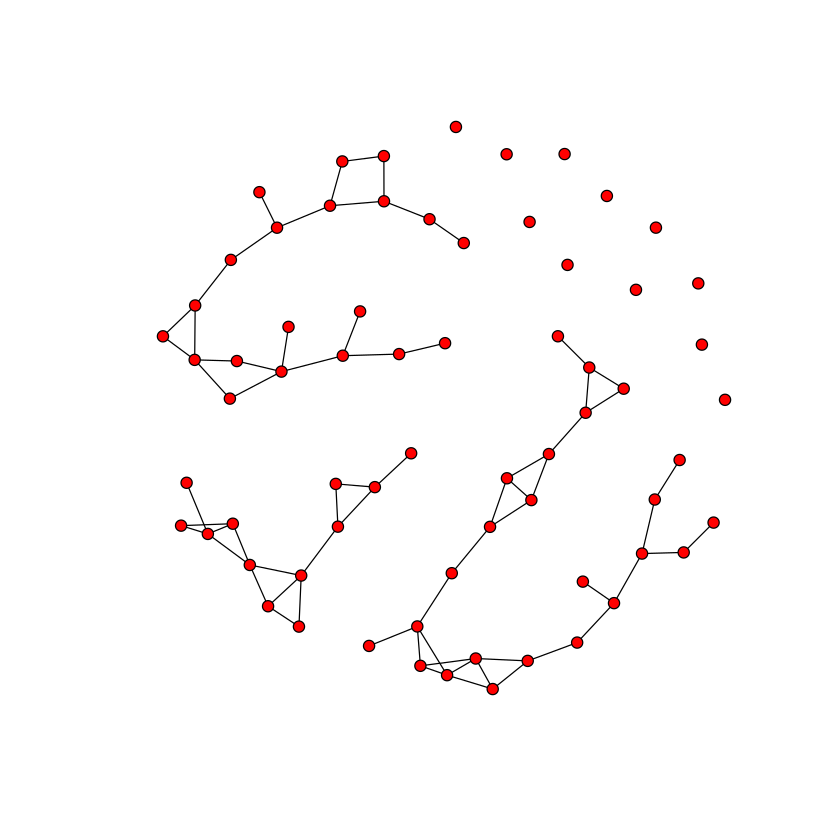

In [20]:
energy1(matrices[[18]][[1]])
energy1(generator_e(72,67))

In [2]:
#ENERGÍA y NUM DE VERTICES
generator_e(72)

ERROR: Error in generator_e(72): no se pudo encontrar la función "generator_e"


In [1]:
#CREA UN DATAFRAME
df<-data.frame(NUM,ENERGY)

ERROR: Error in data.frame(NUM, ENERGY): objeto 'NUM' no encontrado


In [46]:
df

X__1,X__2,X__3,X__4,X__5,X__6,X__7,X__8,X__9,X__10,⋯,X__70,X__71,X__72,X__73,X__74,X__75,X__76,X__77,X__78,X__79
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [47]:
#help(predict)
cor(df$ENERGY,df$NUM)

Warning message:
“Unknown or uninitialised column: 'NUM'.”Warning message:
“Unknown or uninitialised column: 'ENERGY'.”

ERROR: Error in cor(df$ENERGY, df$NUM): supply both 'x' and 'y' or a matrix-like 'x'


In [48]:
scatter.smooth(x=df$ENERGY,y=df$NUM,main="ENERGY-NUM")
abline(linear)

Warning message:
“Unknown or uninitialised column: 'NUM'.”Warning message:
“Unknown or uninitialised column: 'ENERGY'.”Warning message in min(x):
“ningún argumento finito para min; retornando Inf”Warning message in max(x):
“ningun argumento finito para max; retornando -Inf”

ERROR: Error in seq.int(min(x), max(x), length.out = evaluation): 'from' must be a finite number


In [50]:
linear<-lm(NUM~ENERGY,data=df)

ERROR: Error in eval(predvars, data, env): objeto 'NUM' no encontrado


In [51]:
summary(linear)

ERROR: Error in summary(linear): objeto 'linear' no encontrado


In [3]:
#PRUEBA
f<-data.frame(ENERGY=165)
predict(linear,f)

ERROR: Error in predict(linear, f): objeto 'linear' no encontrado


In [4]:
help(sample)